# 타이타닉 데이터 EDA

## EDA란?
Exploratory data analysis(탐색적 데이터 분석)으로 주어진 데이터를 다양한 방법으로 정보를 찾아내는 데이터 분석 방법  
모델링 이전 데이터를 확인하고 흟어보면서 데이터에 대한 이해를 목적으로 시행되며 이를 바탕으로 정교한 모델링을 수행 할 수 있다.

## titanic 데이터 설명
타이타닉호에 승선했던 탑승자 정보를 담고 있는 데이터이다. 데이터분석 필드에서는 교육용 및 입문용 데이터로 오랫동안 사랑받아 온 데이터이며  
탑승자 정보를 바탕으로 이 탑승자가 생존했는지 혹은 사망했는지 분류하는 모델링을 목적으로 제작 된 데이터입니다.  

**columns 정보**
- pclass : 객실 등급
- survived : 생존 유무
- name : 칭호를 포함한 이름
- sex : 성별
- age : 나이
- sibsp : 형제 혹은 부부의 수
- parch : 부모, 혹은 자녀의 수
- ticket : 탑승권 종류 (각 숫자가 의미하는 바는 데이터를 통해 알 수 있는 것이 없을 수 있습니다.)
- fare : 지불한 운임
- cabin : 객실정보
- embarked : 선착장정보
- boat : 탈출한 보트가 있다면 boat 번호
- body : 사망자의 시신 수습 후 부여한 일련번호
- home : 출신

## EDA 진행

### 타이타닉 탑승자 데이터 불러오기

In [ ]:
# 필요모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터 로딩 및 확인
df = pd.read_csv('titanic.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### 결측치 처리하기

In [ ]:
# 데이터 종류 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


age, cabin, embarked, boat, body, home.dest에 결측치가 있음을 확인할 수 있다.

이 중, float 타입인 age와 fare는 각 column의 평균 값으로 결측치를 채워주고,

데이터가 너무 적은 cabin, boat. body, home.dest column은 삭제시켜준다.

In [ ]:
# age와 fare 결측치에 평균값 채워주기

df['age'].fillna(df['age'].mean(), inplace=True)
df['fare'].fillna(df['fare'].mean(), inplace=True)

In [ ]:
# 결측치가 많아 분석하기 어려운 cabin, boat, body, home.dest 삭제
df = df.drop(['cabin','boat','body','home.dest'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1309 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1309 non-null   float64
 9   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 102.4+ KB


In [ ]:
# 결측치 제거
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1307 non-null   int64  
 1   survived  1307 non-null   int64  
 2   name      1307 non-null   object 
 3   sex       1307 non-null   object 
 4   age       1307 non-null   float64
 5   sibsp     1307 non-null   int64  
 6   parch     1307 non-null   int64  
 7   ticket    1307 non-null   object 
 8   fare      1307 non-null   float64
 9   embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(4)
memory usage: 112.3+ KB


* 모든 column이 1307개의 값을 갖는, 결측치가 없는 데이터를 만들어냈다

### 데이터 살펴보기

In [ ]:
# 우선 한 눈에 생존률과 관계가 있는 column을 찾아본다.
# 성별, ticket은 object형이기에 따로 알아본다.
# 밑에 표를 통해서는 pclass와 fare가 비교적 높은 상관관계를 갖고있음을 알 수 있다.

df.corr()

,pclass,survived,age,sibsp,parch,fare
pclass,1.000000,-0.310412,-0.364263,0.059819,0.017304,-0.557709
survived,-0.310412,1.000000,-0.053441,-0.026931,0.083642,0.242902
age,-0.364263,-0.053441,1.000000,-0.190117,-0.130157,0.169899
sibsp,0.059819,-0.026931,-0.190117,1.000000,0.373383,0.161015
parch,0.017304,0.083642,-0.130157,0.373383,1.000000,0.222309
fare,-0.557709,0.242902,0.169899,0.161015,0.222309,1.000000


In [ ]:
df.describe()

,pclass,survived,age,sibsp,parch,fare
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,2.296863,0.381025,29.850351,0.499617,0.385616,33.224011
std,0.836942,0.485825,12.860385,1.042273,0.866092,51.746164
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,3.000000,0.000000,29.881138,0.000000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200


In [ ]:
# 성별은 분석하기 좋게 남자를 0, 여자를 1로 변경한다.

def convert(x):
    if x=="male":
        return 0
    else:
        return 1
df['sex'] = df['sex'].map(convert)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,151.5500,S


### 데이터 상관관계 분석

#### 객실 등급별 생존률

In [ ]:
df.groupby('pclass').mean()

,survived,sex,age,sibsp,parch,fare
pclass,,,,,,
1,0.616822,0.442368,37.965060,0.439252,0.367601,87.555777
2,0.429603,0.382671,29.528333,0.393502,0.368231,21.179196
3,0.255289,0.304654,26.302224,0.568406,0.400564,13.331087


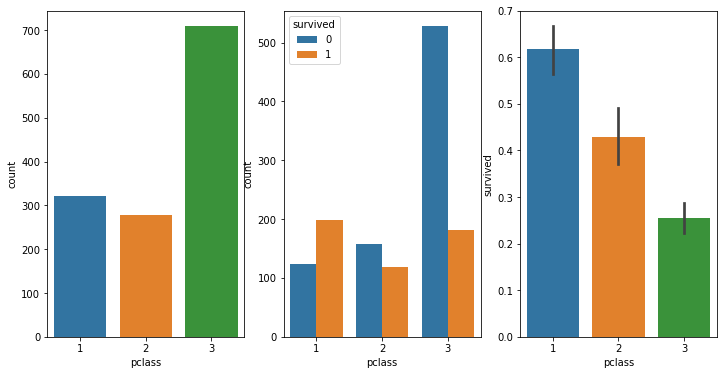

In [ ]:
plt.figure(figsize=(12,6))

# 클래스별 인원 수
plt.subplot(1,3,1)
sns.countplot(data=df, x='pclass')

# 클래스별 생존/사망자 수
plt.subplot(1,3,2)
sns.countplot(data=df, x='pclass', hue='survived')
 
# 클래스별 생존률
plt.subplot(1,3,3)
sns.barplot(data=df, x='pclass', y='survived')

plt.show()

객실 등급은 '3'인 사람이 가장 많다.

하지만 등급별 생존률을 본다면 '등급1'이 인원수는 '등급3'에 비해 적었지만 61%로 가장 높았다.

인원이 가장 많은 '등급3'은 오히려 생존률은 25%로 가장 낮다.

#### 성별에 따른 생존률

In [ ]:
# 0:남성, 1:여성

df.groupby('sex').mean()

,pclass,survived,age,sibsp,parch,fare
sex,,,,,,
0,2.372479,0.190985,30.430712,0.413998,0.247924,26.163072
1,2.159483,0.726293,28.795946,0.655172,0.635776,46.052399


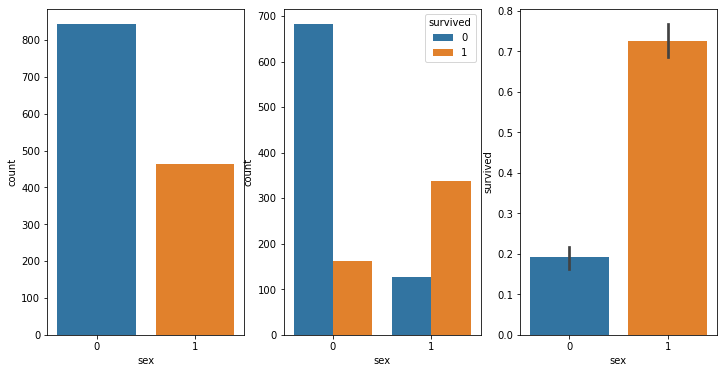

In [ ]:
plt.figure(figsize=(12,6))

# 남녀 수
plt.subplot(1,3,1)
sns.countplot(data=df, x='sex')

# 성별 생존/사망자 수
plt.subplot(1,3,2)
sns.countplot(data=df, x='sex', hue='survived')

# 성별 생존률
plt.subplot(1,3,3)
sns.barplot(data=df, x='sex', y='survived')

plt.show()

타이타닉호에 탑승한 성별은 남성이 여성보다 많았다.

하지만 생존률은 여성 72%, 남성 19%로 여성이 월등하기 높다.

따라서 성별은 생존률에 영향을 미친다는 것을 알 수있다.

#### 나이별 생존률

In [ ]:
df['age'].describe()

count    1307.000000
mean       29.850351
std        12.860385
min         0.170000
25%        22.000000
50%        29.881138
75%        35.000000
max        80.000000
Name: age, dtype: float64

In [ ]:
# 나이가 float형이기 때문에 분석하기 좋게 나이대 별로 나누어준다.

def sp_age(x):
    if x<10:
        return '0-9'
    elif x<20: 
        return '10-19'
    elif x<30:
        return '20-29'
    elif x<40:
        return '30-39'
    elif x<50:
        return '40-49'
    else:
        return '50-80'
    
df['sp_age'] = df['age'].map(sp_age)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,sp_age
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,211.3375,S,20-29
1,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,S,0-9
2,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,151.5500,S,0-9
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,151.5500,S,30-39
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,151.5500,S,20-29


In [ ]:
df.groupby('sp_age').mean()

,pclass,survived,sex,age,sibsp,parch,fare
sp_age,,,,,,,
0-9,2.634146,0.609756,0.475610,4.026463,1.646341,1.390244,29.310059
10-19,2.489510,0.391608,0.447552,16.643357,0.734266,0.482517,31.713172
20-29,2.525535,0.329489,0.317957,26.788697,0.393740,0.232290,23.742729
30-39,2.108225,0.419913,0.367965,33.841991,0.346320,0.316017,41.119191
40-49,1.851852,0.385185,0.340741,44.137037,0.370370,0.503704,42.396421
50-80,1.467890,0.394495,0.339450,57.500000,0.403670,0.357798,62.857681


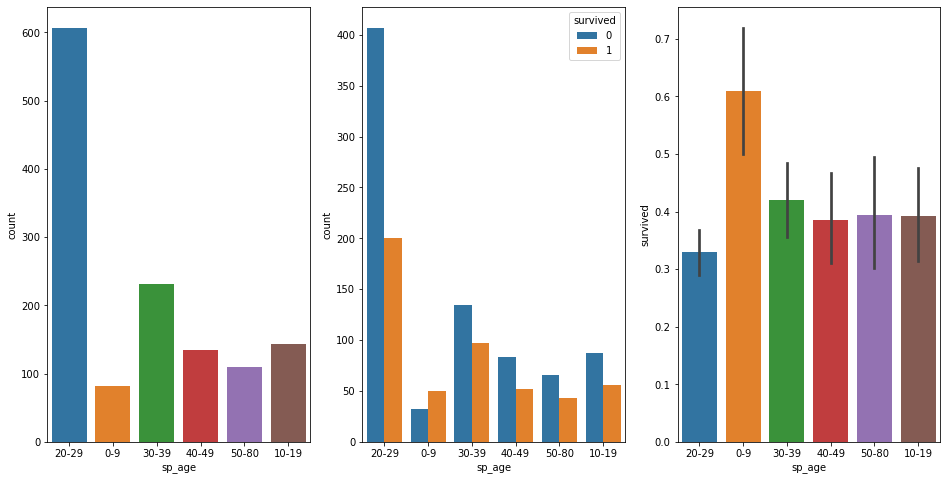

In [ ]:
plt.figure(figsize=(16,8))

# 나이대별 인원수
plt.subplot(1,3,1)
sns.countplot(data=df, x='sp_age')

# 나이대별 생존/사망자 수
plt.subplot(1,3,2)
sns.countplot(data=df, x='sp_age', hue='survived')

# 나이대별 생존률
plt.subplot(1,3,3)
sns.barplot(data=df, x='sp_age', y='survived')

plt.show()

나이대별 분포를 보면 20대와 30대가 가장 많음을 알 수 있다.

하지만 생존률을 보면 20대는 인원수에 비해 매우 낮고, 가장 높은 생존률은 0-9세의 유아임을 알 수 있다.

다른 나이대의 생존률은 거의 차이가 없다. 따라서 유아를 제외하면 나이는 생존률에 큰 영향을 미치지 않는다. 

#### 형제, 부부 / 부모와 자녀의 수에 따른 생존률

In [ ]:
df.groupby('sibsp').mean()

,pclass,survived,sex,age,parch,fare
sibsp,,,,,,
0,2.354331,0.345332,0.292463,30.637710,0.182227,25.671886
1,2.034483,0.510972,0.501567,30.914183,0.717868,48.711300
2,2.333333,0.452381,0.452381,24.471115,0.571429,48.940576
3,2.550000,0.300000,0.600000,19.026228,1.250000,71.332090
4,3.000000,0.136364,0.318182,8.772727,1.545455,30.594318
5,3.000000,0.000000,0.333333,10.166667,2.000000,46.900000
8,3.000000,0.000000,0.444444,28.172122,2.000000,69.550000


In [ ]:
df.groupby('parch').mean()

,pclass,survived,sex,age,sibsp,fare
parch,,,,,,
0,2.314000,0.334000,0.291000,31.444686,0.244000,26.229445
1,2.158824,0.588235,0.517647,25.254773,1.029412,50.078358
2,2.300885,0.504425,0.610619,20.520073,1.902655,61.346275
3,2.125000,0.625000,0.750000,38.875000,0.875000,86.688537
4,2.333333,0.166667,0.666667,44.646856,0.666667,104.723617
5,3.000000,0.166667,0.666667,39.333333,0.666667,32.356250
6,3.000000,0.000000,0.500000,41.500000,1.000000,46.900000
9,3.000000,0.000000,0.500000,29.881138,1.000000,69.550000


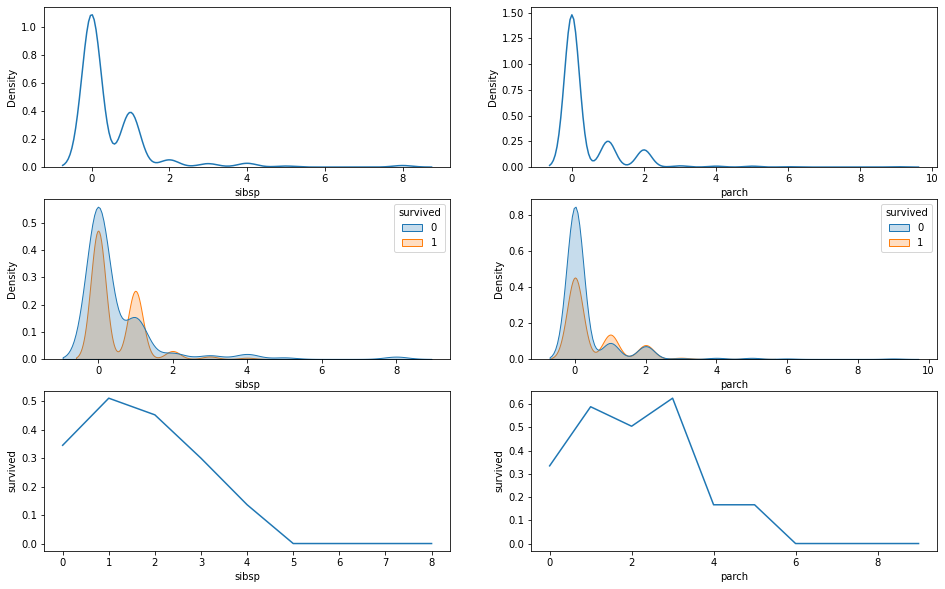

In [ ]:
plt.figure(figsize=(16,10))

# 형제&부부 수 분포
plt.subplot(3,2,1)
sns.kdeplot(data=df, x='sibsp')

# 부모&자식 수 분포
plt.subplot(3,2,2)
sns.kdeplot(data=df, x='parch')

# 형제&부부 생존/사망자 분포
plt.subplot(3,2,3)
sns.kdeplot(data=df, x='sibsp', hue='survived', shade=True)

# 부모&자식 생존/사망자 분포
plt.subplot(3,2,4)
sns.kdeplot(data=df, x='parch', hue='survived', shade=True)

# 형제&부부 수에 따른 생존률
plt.subplot(3,2,5)
sns.lineplot(data=df, x='sibsp', y='survived', ci=None)

# 부모&자식 수에 따른 생존률
plt.subplot(3,2,6)
sns.lineplot(data=df, x='parch', y='survived', ci=None)

plt.show()

형제&부부 / 부모&자식 column은 비슷한 데이터 분포를 띄고 있어 함께 분석하였다.

먼저, 두 컬럼 모두 한 명도 없는 0이 가장 많다.

생존률을 분석하였을 때, 두 컬럼의 그래프 비슷한 모양을 하고 있다.

sibsp는 1명일 때, parch는 3명일 때까지 생존률이 높지만, 인원이 더 많으면 '가족이 많아 생존률이 높지 않을까' 라는예상과 달리

생존률이 낮음을 확인할 수 있다.

#### 지불한 비용과 생존률

<AxesSubplot:xlabel='fare', ylabel='Density'>

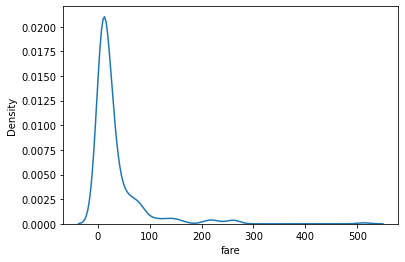

In [ ]:
# 비용이 0~50 사이에 몰려있으므로 50 이상 값을 확인하기 힘들다.

sns.kdeplot(data=df, x='fare')

In [ ]:
df['fare'].describe()

count    1307.000000
mean       33.224011
std        51.746164
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: fare, dtype: float64

In [ ]:
# 운임비를 cheap, mid, expensive로 나누어준다

def Fare(x):
    if x<8:
        return 'cheap'
    elif x<14.5:
        return 'mid'
    else:
        return 'expensive'
    
df['sp_fare'] = df['fare'].map(Fare)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,sp_age,sp_fare
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,211.3375,S,20-29,expensive
1,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,S,0-9,expensive
2,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,151.5500,S,0-9,expensive
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,151.5500,S,30-39,expensive
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,151.5500,S,20-29,expensive


In [ ]:
df.groupby('sp_fare').mean()

,pclass,survived,sex,age,sibsp,parch,fare
sp_fare,,,,,,,
cheap,2.938889,0.238889,0.222222,28.492722,0.086111,0.033333,7.213471
expensive,1.809598,0.510836,0.458204,31.306614,0.894737,0.708978,58.181217
mid,2.574751,0.272425,0.292359,28.348693,0.146179,0.112957,10.770321


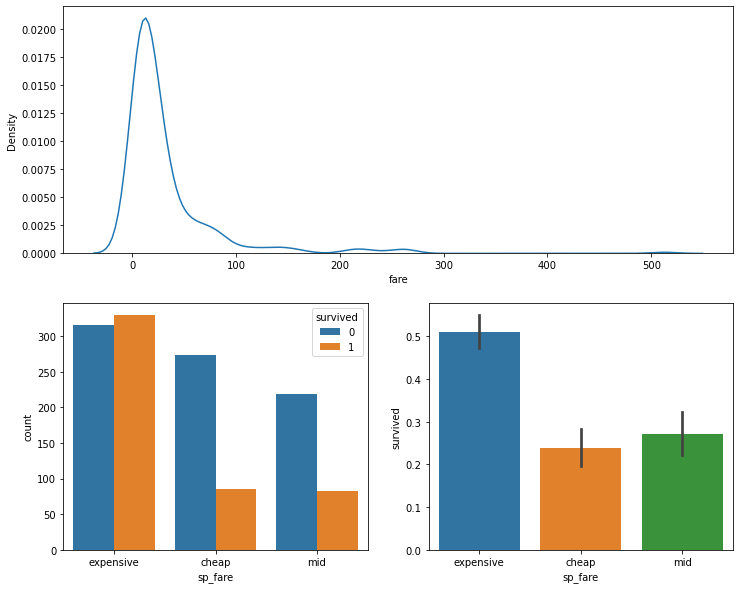

In [ ]:
plt.figure(figsize=(12,10))

# 운임비 전체 분포
plt.subplot(2,1,1)
sns.kdeplot(data=df, x='fare')

# 3가지 경우로 나눈 운임비별 사망/생존자 수
plt.subplot(2,2,3)
sns.countplot(data=df, x='sp_fare', hue='survived')

# 운임비별 생존률
plt.subplot(2,2,4)
sns.barplot(data=df, x='sp_fare', y='survived')

plt.show()

운임비를 cheap, mid, expensive로 봤을 때, 

그래프를 보면 가격이 비싸질수록 생존률이 높았음을 알 수 있다.

### 다변수 분석

#### 성별과 pclass로 인한 생존률 관계

pclass는 1급일수록 생존률이 높았다.
성별 또한 여성일 때 생존률이 높았기에 
1등급에 여성이 많이 있었는지 생존률과 함께 분석해본다 

In [ ]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,sp_age,sp_fare
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,211.3375,S,20-29,expensive
1,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,S,0-9,expensive
2,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,151.5500,S,0-9,expensive
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,151.5500,S,30-39,expensive
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,151.5500,S,20-29,expensive


In [ ]:
# 남녀모두 3class에 가장 많이 분포되어있다. 하지만 전체 분포를 보면 여성이 남성보다 1class에 더 많이 분포되어있다.

df.pivot_table(index=['pclass','sex'], values='name', aggfunc='count')

name
pclass sex      
1      0     179
       1     142
2      0     171
       1     106
3      0     493
       1     216

In [ ]:
# 평균 생존률을 비교했을 떄, 모든 class에서 여성이 더 높았으며 특히 1class의 여성은 거의 모두 살아남았다.

df.pivot_table(index=['pclass','sex'], values='survived')

survived
pclass sex          
1      0    0.340782
       1    0.964789
2      0    0.146199
       1    0.886792
3      0    0.152130
       1    0.490741

<AxesSubplot:xlabel='pclass', ylabel='survived'>

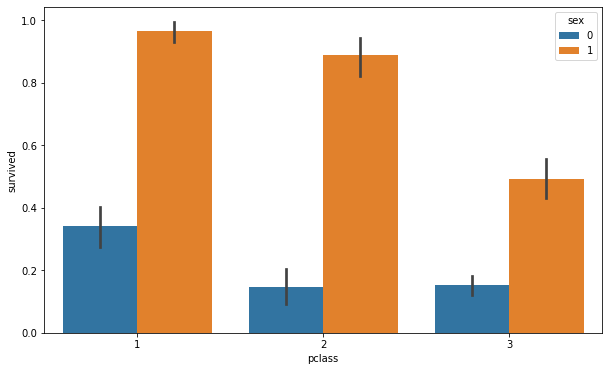

In [ ]:
# 클래스와 성별에 따른 생존률

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='pclass', y='survived', hue='sex')

예상과 달리 여성은 3class에 가장 많았다. 

하지만 3class의 여성들은 남성과 비교해 훨씬 높은 생존률을 보였으며 특히 1class의 여성은 거의 모두 살아남았다.

남성같은 경우, pclass만 비교하였을 때에는 양의 상관관계였지만 오히려 2class의 남성들이 3class의 남성들보다 생존률이 낮음을 알 수 있다.

따라서 생존률은 pclass보단 성별과 더 상관관계가 있음을 확인할 수 있다.

#### 나이대별 운임비용과 생존률

나이대별에서 10세이하의 유아들이 생존률이 가장 높았다.
반대로 운임비용을 가장 많이 냈을 때 생존률이 높았는데 이 둘의 관계를 분석해본다.

In [ ]:
pd.pivot_table(data=df, index='sp_age', values='fare')

,fare
sp_age,
0-9,29.310059
10-19,31.713172
20-29,23.742729
30-39,41.119191
40-49,42.396421
50-80,62.857681


In [ ]:
pd.pivot_table(data=df, index=['sp_age','sp_fare'], values='survived')

survived
sp_age sp_fare            
0-9    cheap      1.000000
       expensive  0.602941
       mid        0.615385
10-19  cheap      0.297297
       expensive  0.451613
       mid        0.386364
20-29  cheap      0.252033
       expensive  0.493151
       mid        0.211268
30-39  cheap      0.163265
       expensive  0.590164
       mid        0.283333
40-49  cheap      0.200000
       expensive  0.451613
       mid        0.272727
50-80  cheap      0.000000
       expensive  0.475610
       mid        0.200000

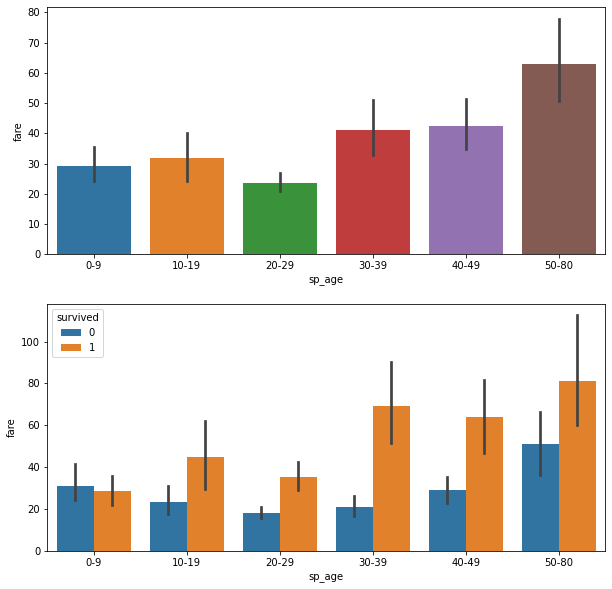

In [ ]:
plt.figure(figsize=(10,10))

# 나이대별 운임비
plt.subplot(2,1,1)
sns.barplot(data= df, x=df['sp_age'].sort_values(), y='fare')

# 나이대별 운임비에 따른 생존/사망자 비율
plt.subplot(2,1,2)
sns.barplot(data= df, x=df['sp_age'].sort_values(), y='fare',hue='survived')

plt.show()

운임비는 나이가 어리다고 무조건 저렴하지 않고 20대에서 가장 저렴하게 나왔다.

또한, 두 번째 그래프를 통해, 유아는 운임비에 상관 없이 비슷한 생존률을 보이지만, 

10대 이상부터는 운임비가 비쌌던 만큼 생존률이 더 높았음을 알 수 있다.

### 결론

각 컬럼별로 생존률과의 상관관계를 그래프와 함께 분석해보았다.

생존률과 상관관계가 가장 높았던 것은 성별이였으며 여성의 생존률이 훨씬 높았다.

양의 상관관계를 갖는 것은 fare로 지불한 운임비가 높을 수록 생존률이 높았으며,
 
음의 상관관계를 갖는 것은 pclass(작을 수록 좋은 class)이였다.

sibsp와 parch는 값이 각각 1, 3일때 이후로는 음의 상관관계를 갖는 것을 보았을 때
소수의 가족은 서로를 지키며 생존할 수 있었지만, 그 수가 너무 많아지면 생존률이 떨어짐을 알 수 있다.

나이로는 유아와 성인으로 나눌 때만 유의미한 상관관계를 갖고 있음을 알 수 있었다.